In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

RANDOM_SEED=44

In [27]:
df = pd.read_csv('zadanie1_dataset.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11960 non-null  float64
 1   energy             11960 non-null  float64
 2   loudness           11960 non-null  float64
 3   speechiness        11960 non-null  float64
 4   acousticness       11960 non-null  float64
 5   instrumentalness   11960 non-null  float64
 6   liveness           11960 non-null  float64
 7   valence            11960 non-null  float64
 8   tempo              11960 non-null  float64
 9   duration_ms        11960 non-null  float64
 10  popularity         11843 non-null  float64
 11  number_of_artists  11839 non-null  float64
 12  explicit           11960 non-null  bool   
 13  name               11960 non-null  object 
 14  url                11960 non-null  object 
 15  genres             11960 non-null  object 
 16  filtered_genres    119

In [29]:
df.describe().loc[['min', 'max']]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,number_of_artists
min,0.000,0.000197,-47.046,0.000,0.000,0.000,0.00967,0.000,0.000,-4.273460e+05,0.0,1.0
max,8.375,1.000000,1.519,0.965,0.996,0.994,0.99700,0.995,241.423,1.930821e+09,82.0,19.0


In [30]:
print(df['loudness'].count())
print(df['duration_ms'].count())
print(df['danceability'].count())

11960
11960
11960


We can see that columns loudness and duration_ms have outliers. All of the other columns with numeric values are fine. In the next cell we will exclude the outliers of the two columns.
### TODO: whether categorical can have outliers

In [31]:
df['loudness'] = df[df['loudness'] <= 0]['loudness']
df['duration_ms'] = df[df['duration_ms'] > 0]['duration_ms']
df['danceability'] = df[df['danceability'] <= 1]['danceability']

In [32]:
print(df['loudness'].count())
print(df['duration_ms'].count())
print(df['danceability'].count())

11957
11948
11944


In [33]:
df.describe().loc[['min', 'max']]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,number_of_artists
min,0.000,0.000197,-47.046,0.000,0.000,0.000,0.00967,0.000,0.000,1.408000e+04,0.0,1.0
max,0.975,1.000000,-0.116,0.965,0.996,0.994,0.99700,0.995,241.423,1.930821e+09,82.0,19.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11944 non-null  float64
 1   energy             11960 non-null  float64
 2   loudness           11957 non-null  float64
 3   speechiness        11960 non-null  float64
 4   acousticness       11960 non-null  float64
 5   instrumentalness   11960 non-null  float64
 6   liveness           11960 non-null  float64
 7   valence            11960 non-null  float64
 8   tempo              11960 non-null  float64
 9   duration_ms        11948 non-null  float64
 10  popularity         11843 non-null  float64
 11  number_of_artists  11839 non-null  float64
 12  explicit           11960 non-null  bool   
 13  name               11960 non-null  object 
 14  url                11960 non-null  object 
 15  genres             11960 non-null  object 
 16  filtered_genres    119

In [35]:
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11526 entries, 0 to 11959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11526 non-null  float64
 1   energy             11526 non-null  float64
 2   loudness           11526 non-null  float64
 3   speechiness        11526 non-null  float64
 4   acousticness       11526 non-null  float64
 5   instrumentalness   11526 non-null  float64
 6   liveness           11526 non-null  float64
 7   valence            11526 non-null  float64
 8   tempo              11526 non-null  float64
 9   duration_ms        11526 non-null  float64
 10  popularity         11526 non-null  float64
 11  number_of_artists  11526 non-null  float64
 12  explicit           11526 non-null  bool   
 13  name               11526 non-null  object 
 14  url                11526 non-null  object 
 15  genres             11526 non-null  object 
 16  filtered_genres    11526 no

In [37]:
explicit_dict = {True: 1, False: 0}

df['explicit'] = df['explicit'].map(explicit_dict)

In [38]:
drop_columns = ['name', 'url', 'genres', 'filtered_genres']

df.drop(drop_columns, axis=1, inplace=True)

In [39]:
one_hot_columns = pd.get_dummies(df['top_genre'], prefix='genre')
one_hot_columns = one_hot_columns.astype(int)
df = pd.concat([df, one_hot_columns], axis=1)
df.drop('top_genre', axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11526 entries, 0 to 11959
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11526 non-null  float64
 1   energy             11526 non-null  float64
 2   loudness           11526 non-null  float64
 3   speechiness        11526 non-null  float64
 4   acousticness       11526 non-null  float64
 5   instrumentalness   11526 non-null  float64
 6   liveness           11526 non-null  float64
 7   valence            11526 non-null  float64
 8   tempo              11526 non-null  float64
 9   duration_ms        11526 non-null  float64
 10  popularity         11526 non-null  float64
 11  number_of_artists  11526 non-null  float64
 12  explicit           11526 non-null  int64  
 13  emotion            11526 non-null  object 
 14  genre_ambient      11526 non-null  int64  
 15  genre_anime        11526 non-null  int64  
 16  genre_bluegrass    11526 no

In [41]:
emotion_dict = { 'sad': 0, 'happy': 1, 'energetic' : 2, 'calm': 3}
emotion_values = ['sad', 'happy', 'energetic', 'calm']

In [42]:
df['emotion'] = df['emotion'].map(emotion_dict)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11526 entries, 0 to 11959
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11526 non-null  float64
 1   energy             11526 non-null  float64
 2   loudness           11526 non-null  float64
 3   speechiness        11526 non-null  float64
 4   acousticness       11526 non-null  float64
 5   instrumentalness   11526 non-null  float64
 6   liveness           11526 non-null  float64
 7   valence            11526 non-null  float64
 8   tempo              11526 non-null  float64
 9   duration_ms        11526 non-null  float64
 10  popularity         11526 non-null  float64
 11  number_of_artists  11526 non-null  float64
 12  explicit           11526 non-null  int64  
 13  emotion            11526 non-null  int64  
 14  genre_ambient      11526 non-null  int64  
 15  genre_anime        11526 non-null  int64  
 16  genre_bluegrass    11526 no

In [44]:
X = df.drop('emotion', axis=1)
y = df['emotion']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

In [45]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [46]:
clf = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64, 32),
    early_stopping=True,
    max_iter=1000,
    random_state=RANDOM_SEED,
    learning_rate_init=0.01,
    validation_fraction=0.2
).fit(X_train, y_train)

In [47]:
y_pred = clf.predict(X_train)
print('MLP accuracy on train set: ', accuracy_score(y_train, y_pred))
cm_train = confusion_matrix(y_train, y_pred)

MLP accuracy on train set:  0.8831887201735358


In [48]:
y_pred = clf.predict(X_val)
print('MLP accuracy on val set: ', accuracy_score(y_val, y_pred))
cm_val = confusion_matrix(y_val, y_pred)

MLP accuracy on val set:  0.8594969644405898


In [49]:
y_pred = clf.predict(X_test)
print('MLP accuracy on test set: ', accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_test, y_pred)

MLP accuracy on test set:  0.8603642671292281


In [21]:
clf.classes_

array([0, 1, 2, 3])

In [22]:
emotion_values

['sad', 'happy', 'energetic', 'calm']

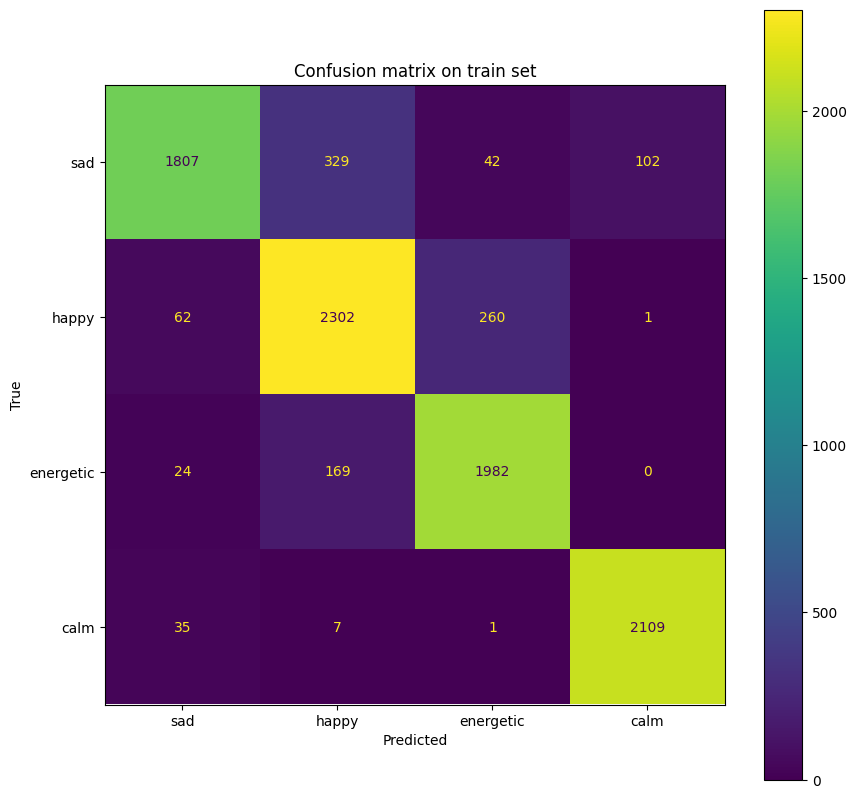

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=emotion_values)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on train set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

In [50]:
diagonal_values = np.diag(cm_train)
ranked_classes = np.argsort(diagonal_values)[::-1]
print("Ranked classes:", ranked_classes)

Ranked classes: [1 3 2 0]


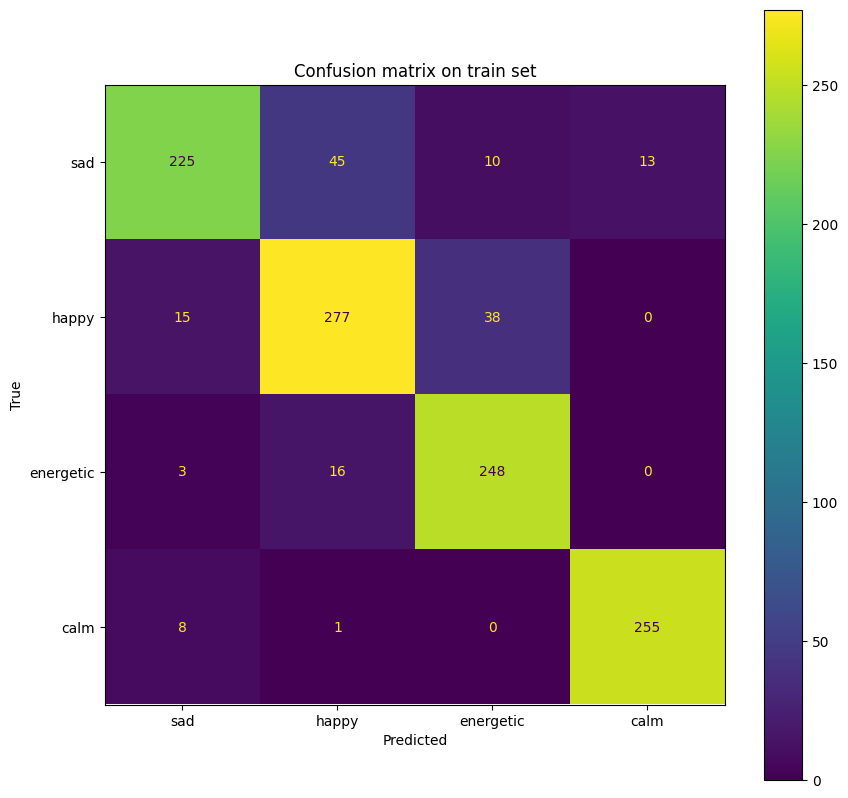

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=emotion_values)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on val set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

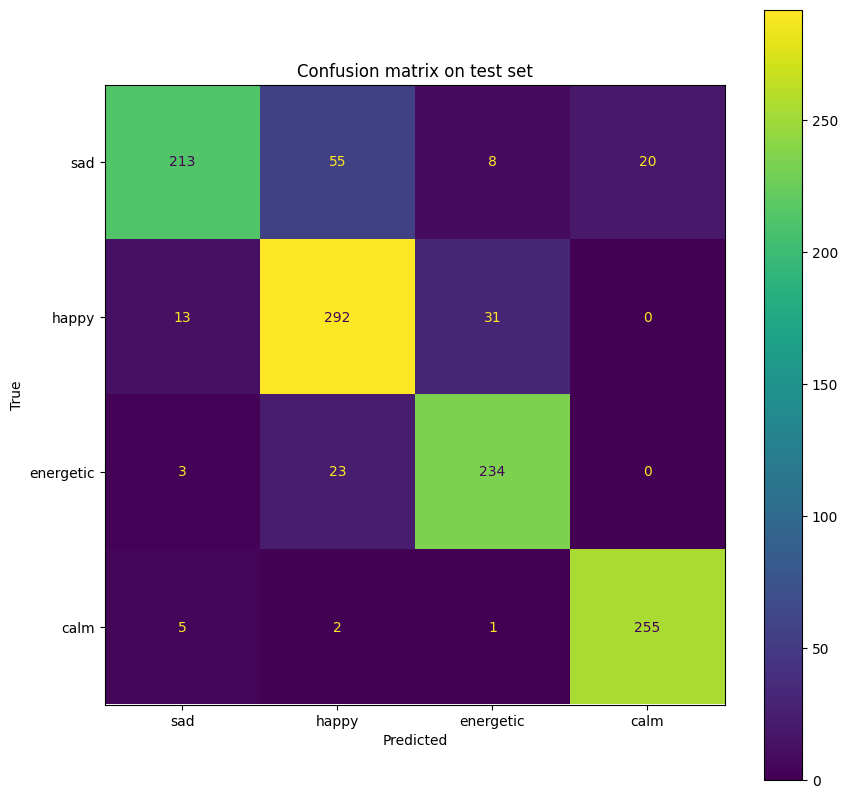

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=emotion_values)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on test set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

# Exploratory data analysis

In [9]:
df_eda = pd.read_csv('zadanie1_dataset.csv')
df_eda['loudness'] = df_eda[df_eda['loudness'] <= 0]['loudness']
df_eda['duration_ms'] = df_eda[df_eda['duration_ms'] > 0]['duration_ms']
df_eda.dropna(inplace=True)

In [10]:
df_eda['top_genre'].unique()

array(['edm', 'house', 'country', 'pop', 'rock', 'soul', 'folk', 'grunge',
       'metalcore', 'metal', 'emo', 'bluegrass', 'ska', 'reggaeton',
       'funk', 'forro', 'industrial', 'dancehall', 'jazz', 'blues',
       'j-rock', 'ambient', 'classical', 'punk', 'rockabilly', 'sleep',
       'j-pop', 'anime', 'disco', 'hardcore', 'opera', 'comedy'],
      dtype=object)

In [11]:
df_eda.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,number_of_artists,explicit,name,url,genres,filtered_genres,top_genre,emotion
0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,194640.0,34.0,3.0,False,Fantasy - Felix Jaehn Remix,https://open.spotify.com/track/7KCWmFdw0TzoJbK...,"['tropical house', 'german dance', 'pop dance'...",['edm'],edm,happy
1,0.744,0.816,-3.933,0.0372,0.1440,0.000009,0.0902,0.748,120.062,144000.0,52.0,3.0,False,Turning Me Up (Hadal Ahbek),https://open.spotify.com/track/4sofJiicQwKsRo3...,"['pop dance', 'edm', 'indonesian viral pop', '...",['edm'],edm,happy
2,0.721,0.768,-4.371,0.0685,0.2100,0.008430,0.2620,0.468,124.076,179032.0,45.0,3.0,True,Problems,https://open.spotify.com/track/2dyrLrVopYKGc3H...,"['progressive electro house', 'progressive hou...",['edm'],edm,energetic
3,0.700,0.782,-4.631,0.0542,0.4490,0.000000,0.1430,0.680,124.969,169901.0,46.0,3.0,False,Closer (feat. Lilly Ahlberg),https://open.spotify.com/track/5FDdviWQzhw7NWH...,"['uk dance', 'tech house', 'pop dance', 'scand...",['house'],house,happy
4,0.764,0.587,-7.002,0.0298,0.0721,0.000006,0.0940,0.494,89.980,229573.0,45.0,2.0,False,Everything's Gonna Be Alright,https://open.spotify.com/track/2NEBP8SXEqwZt2P...,"['country road', 'country', 'contemporary coun...",['country'],country,happy


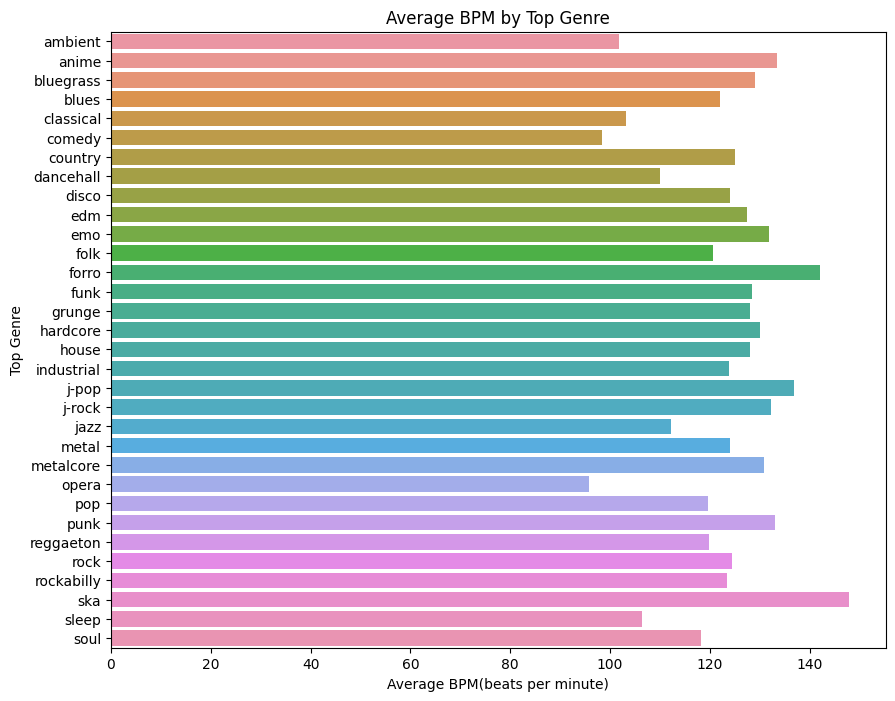

In [12]:
plt.figure(figsize=(10, 8))
grouped_data = df_eda.groupby(['top_genre'])['tempo'].mean().reset_index(name='average')
sns.barplot(data=grouped_data, orient='h', x='average', y='top_genre')
plt.xlabel('Average BPM(beats per minute)')
plt.ylabel('Top Genre')
plt.title('Average BPM by Top Genre')
plt.show()

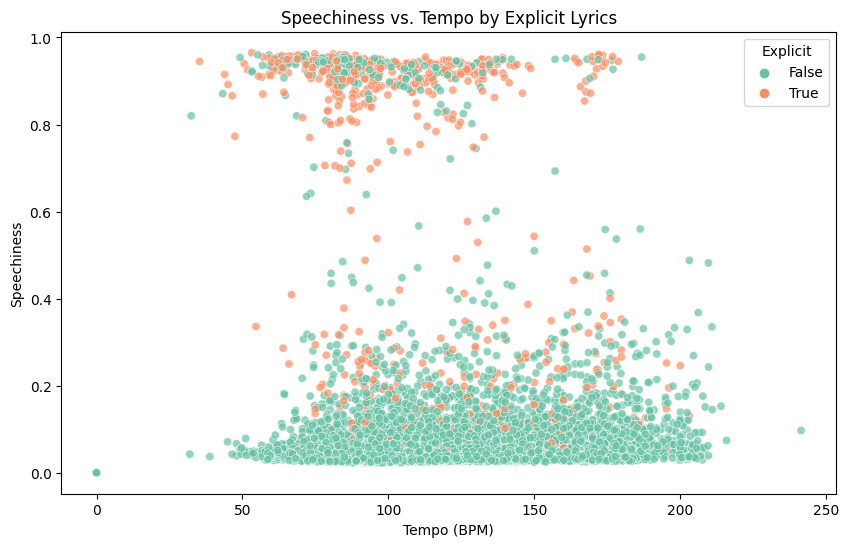

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='tempo', y='speechiness', hue='explicit', palette='Set2', alpha=0.7)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Speechiness')
plt.title('Speechiness vs. Tempo by Explicit Lyrics')
plt.legend(title='Explicit')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


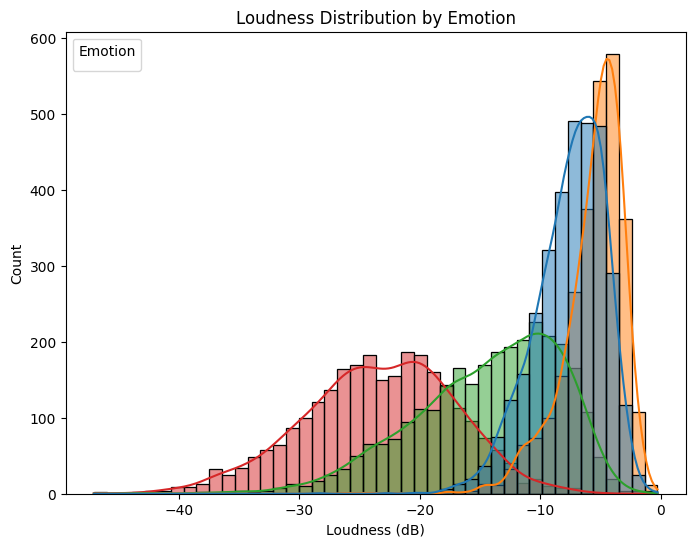

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='loudness', hue='emotion', common_norm=False, kde=True)
plt.xlabel('Loudness (dB)')
plt.title('Loudness Distribution by Emotion')
plt.legend(title='Emotion')
plt.show()

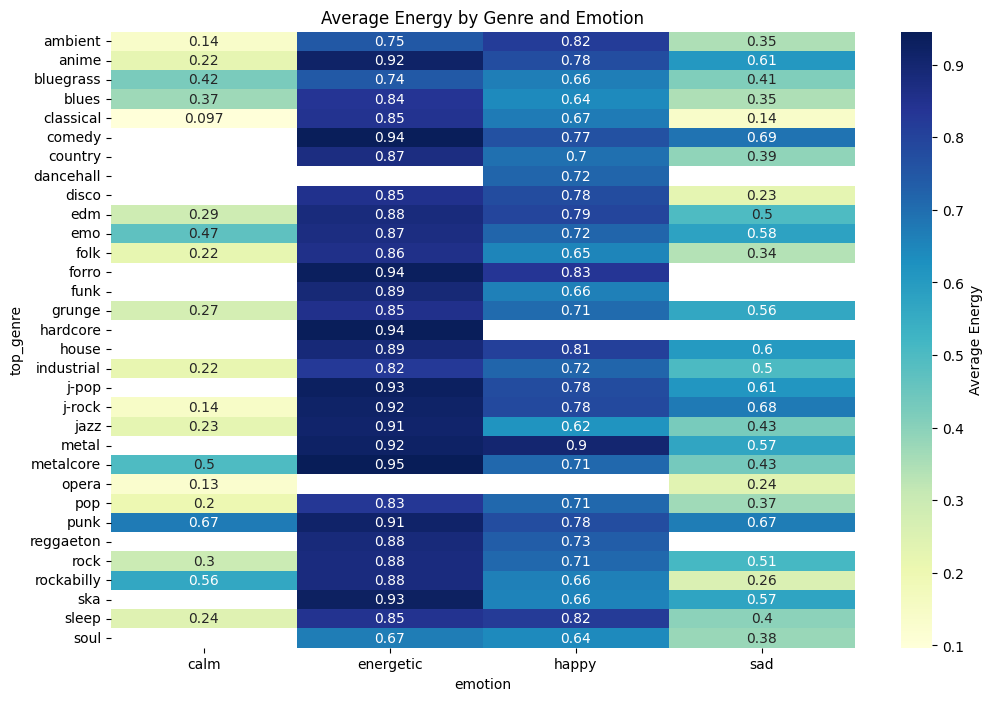

In [15]:
pivot_data = df_eda.pivot_table(index='top_genre', columns='emotion', values='energy', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Energy'})
plt.title('Average Energy by Genre and Emotion')
plt.show()

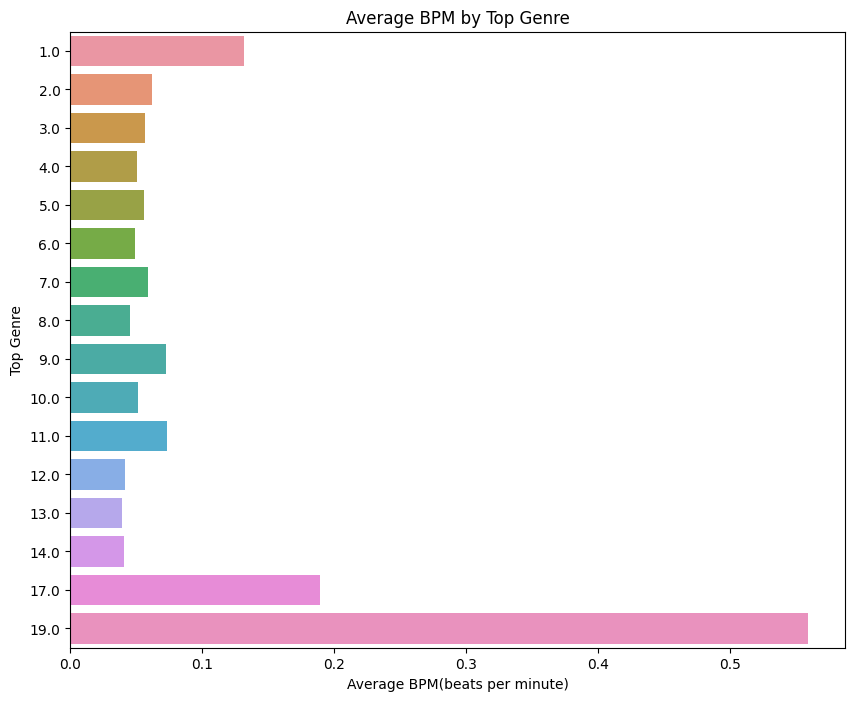

In [32]:
plt.figure(figsize=(10, 8))
grouped_data = df_eda.groupby(['number_of_artists'])['speechiness'].mean().reset_index(name='average')
sns.barplot(data=grouped_data, orient='h', x='average', y='number_of_artists')
plt.xlabel('Average BPM(beats per minute)')
plt.ylabel('Top Genre')
plt.title('Average BPM by Top Genre')
plt.show()

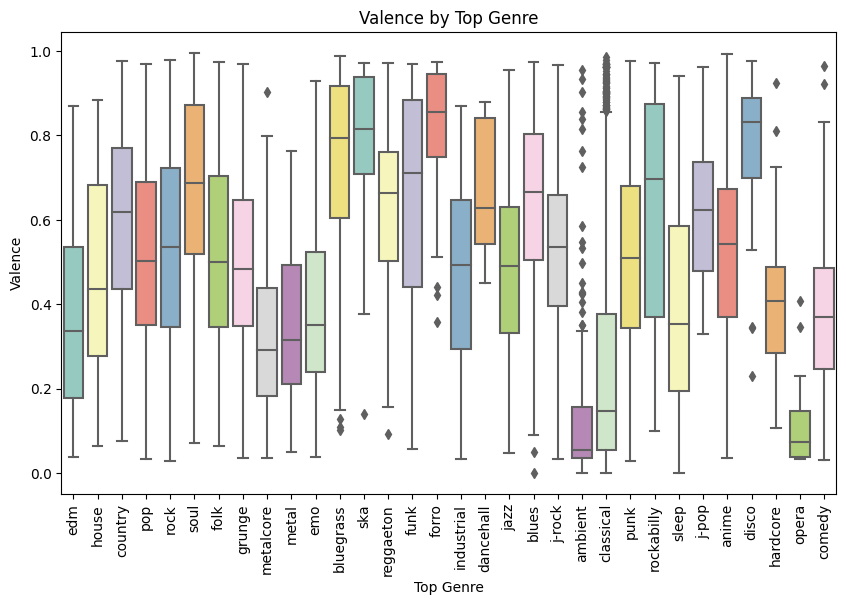

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='top_genre', y='valence', palette='Set3')
plt.xlabel('Top Genre')
plt.ylabel('Valence')
plt.title('Valence by Top Genre')
plt.xticks(rotation=90)
plt.show()

# Natrenovanie neuronky

In [22]:
import torch
import torch.nn as nn
from torch.optim import Adam

torch.manual_seed(RANDOM_SEED)

In [23]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [32]:
df = pd.read_csv('zadanie1_dataset.csv')

emotion_values = ['sad', 'happy', 'energetic', 'calm']
drop_columns = ['name', 'url', 'genres', 'filtered_genres']
emotion_dict = { 'sad': 0, 'happy': 1, 'energetic' : 2, 'calm': 3}
explicit_dict = {True: 1, False: 0}

df['loudness'] = df[df['loudness'] <= 0]['loudness']
df['explicit'] = df['explicit'].map(explicit_dict)
df['top_genre'] = label_encoder.fit_transform(df['top_genre'])
df['duration_ms'] = df[df['duration_ms'] > 0]['duration_ms']
df['emotion'] = df['emotion'].map(emotion_dict)

df.dropna(inplace=True)
df.drop(drop_columns, axis=1, inplace=True)

X = df.drop('emotion', axis=1)
y = df['emotion']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_layer_sizes=[128, 64, 32], dropout_prob=0.0):
        super().__init__()
        
        layers = []
        layers.append(nn.Linear(input_size, hidden_layer_sizes[0]))
        layers.append(nn.ReLU())
        
        for i in range(1, len(hidden_layer_sizes)):
            layers.append(nn.Linear(hidden_layer_sizes[i-1], hidden_layer_sizes[i]))
            layers.append(nn.ReLU())
            if dropout_prob > 0.0:
                layers.append(nn.Dropout(p=dropout_prob))
                
        layers.append(nn.Linear(hidden_layer_sizes[-1], output_size))
        
        self.model = nn.Sequential(*layers)        
        self.best_model_state=None
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        
    def forward(self, x):
        return self.model(x)
    

    
    def train_model(self, X_train, y_train, epochs=100, lr=0.001, X_val=None, y_val=None, early_stopping=False, early_stopping_patience=5):
        best_val_loss = float('inf')
        
        opt = Adam(self.parameters(), lr=lr)
        loss_fn = nn.CrossEntropyLoss()
        
        X_train_tensor = torch.Tensor(X_train)
        y_train_tensor = torch.LongTensor(y_train.values)
        
        if X_val is not None and y_val is not None:
            X_val_tensor = torch.Tensor(X_val)
            y_val_tensor = torch.LongTensor(y_val.values)
            
        for epoch in range(epochs):
            self.train()
            yhat = self(X_train_tensor)
            train_loss = loss_fn(yhat, y_train_tensor)

            _, predicted = torch.max(yhat, 1)
            correct = (predicted == y_train_tensor).sum().item()
            train_accuracy = correct / len(y_train_tensor)

            self.train_losses.append(train_loss.item())
            self.train_accuracies.append(train_accuracy)

            # Backprob
            opt.zero_grad()
            train_loss.backward()
            opt.step()

            # Validation
            if X_val is not None and y_val is not None:
                self.eval()

                with torch.no_grad():
                    yhat_val = self(X_val_tensor)
                    val_loss = loss_fn(yhat_val, y_val_tensor)

                    _, predicted_val = torch.max(yhat_val, 1)
                    correct_val = (predicted_val == y_val_tensor).sum().item()
                    val_accuracy = correct_val / len(y_val_tensor)
    
                self.val_losses.append(val_loss.item())
                self.val_accuracies.append(val_accuracy)

            # Early stopping
            if early_stopping:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    self.best_model_state = self.state_dict()
                    no_improvement_count = 0
                else:
                    no_improvement_count += 1
                    if no_improvement_count >= early_stopping_patience:
    #                     print(f"Early stopping after {epoch + 1} epochs with no improvement.")
                        break
    
#             print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss.item()}, Val Loss: {val_loss.item()}")

#         return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X_test):
        X_test_tensor = torch.Tensor(X_test)
        self.eval()
        with torch.no_grad():
            outputs = self(X_test_tensor)
            _, predicted = torch.max(outputs, 1)
            
        return predicted
    
    def get_accuracy(self, X, y):
        X_tensor = torch.Tensor(X)
        y_tensor = torch.LongTensor(y.values)
        
        self.eval()
        with torch.no_grad():
            outputs = self(X_tensor)
            _, predicted = torch.max(outputs, 1)
        correct = (predicted == y_tensor).sum().item()
        total = y_tensor.size(0)
        accuracy = correct / total
        return accuracy

    def plot_loss(self, model_name):
        plt.figure(figsize=(10, 5))
        plt.plot(self.train_losses, label="Train Loss")
        plt.plot(self.val_losses, label="Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Training and Validation Loss, " + model_name)
        plt.show()
        
    def plot_acc(self, model_name):
        plt.figure(figsize=(10, 5))
        plt.plot(self.train_accuracies, label="Train Accuracy")
        plt.plot(self.val_accuracies, label="Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.title("Training and Validation Accuracy, " + model_name)
        plt.show()
        
    def plot_conf_matrix(self, predicted, y_test, label_values):
        y_test_tensor = torch.LongTensor(y_test.values)
        cm = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_values)
        fig, ax = plt.subplots(figsize=(10,10))
        disp.plot(ax=ax)
        disp.ax_.set_title("Confusion matrix on test set")
        disp.ax_.set(xlabel='Predicted', ylabel='True')
        plt.show()
        
    def test_acc(self, predicted, y_test):
        y_test_tensor = torch.LongTensor(y_test.values)
        correct = (predicted == y_test_tensor).sum().item()
        total = y_test_tensor.size(0)
        accuracy = correct / total

        print("Test Accuracy: {:.2f}%".format(accuracy * 100))
        
    def all_acc(self, X_train, y_train, X_val, y_val, X_test, y_test):
        train_accuracy = self.get_accuracy(X_train, y_train) * 100
        val_accuracy = self.get_accuracy(X_val, y_val) * 100
        test_accuracy = self.get_accuracy(X_test, y_test) * 100

        print(f"Training Accuracy: {train_accuracy:.2f}%")
        print(f"Validation Accuracy: {val_accuracy:.2f}%")
        print(f"Test Accuracy: {test_accuracy:.2f}%")

In [26]:
input_size = len(X.columns)
output_size = len(y.unique())

In [27]:
model = NeuralNetwork(input_size, output_size)
model.train_model(X_train, y_train, epochs=1000, lr=0.001, X_val=X_val, y_val=y_val)

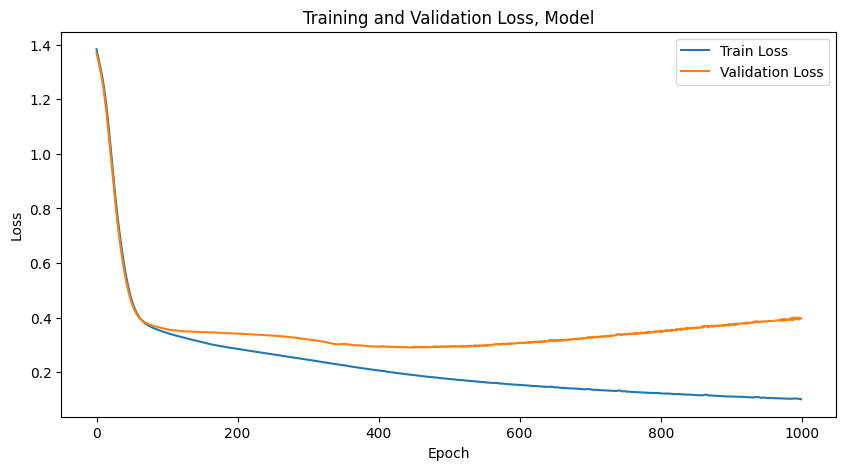

In [28]:
model.plot_loss("Model")

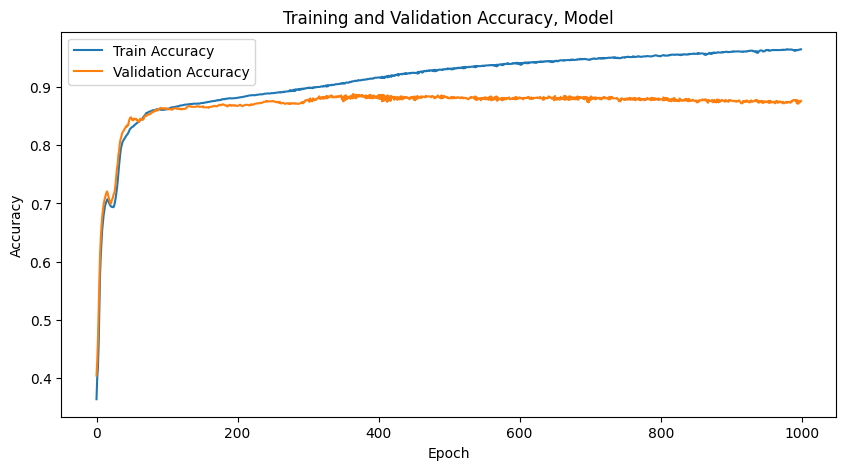

In [29]:
model.plot_acc("Model")

In [30]:
# predicted = model.predict(X_test)
# model.test_acc(predicted, y_test)
model.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 96.50%
Validation Accuracy: 87.62%
Test Accuracy: 85.82%


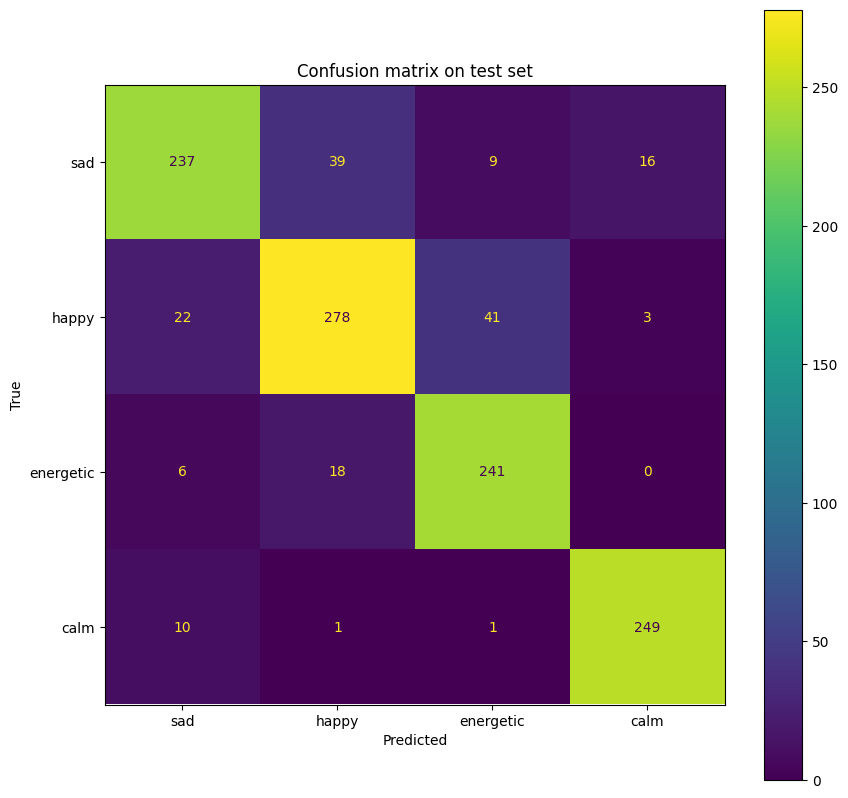

In [33]:
predicted = model.predict(X_test)
model.plot_conf_matrix(predicted, y_test, emotion_values)

## Cast 3, s pouzitim EarlyStoppingu

In [34]:
model_earlyStopping = NeuralNetwork(input_size, output_size)
model_earlyStopping.train_model(X_train, y_train, epochs=1000, lr=0.001, early_stopping=True, early_stopping_patience=4, X_val=X_val, y_val=y_val)
model_earlyStopping.load_state_dict(model_earlyStopping.best_model_state)

<All keys matched successfully>

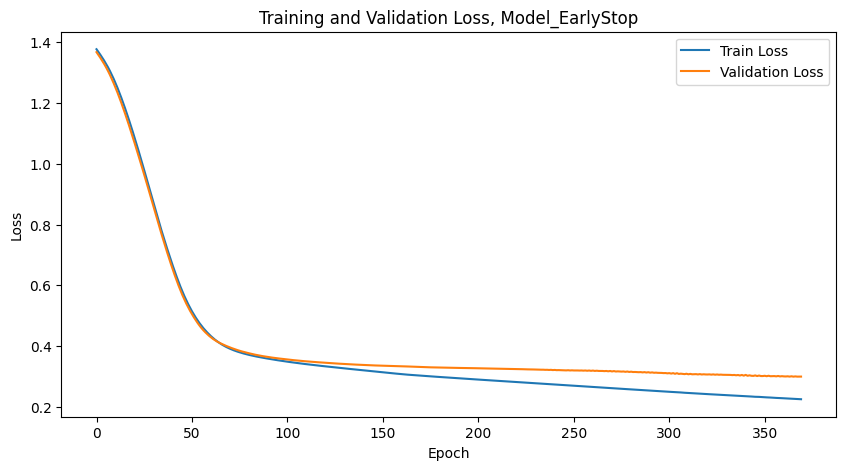

In [35]:
model_earlyStopping.plot_loss("Model_EarlyStop")

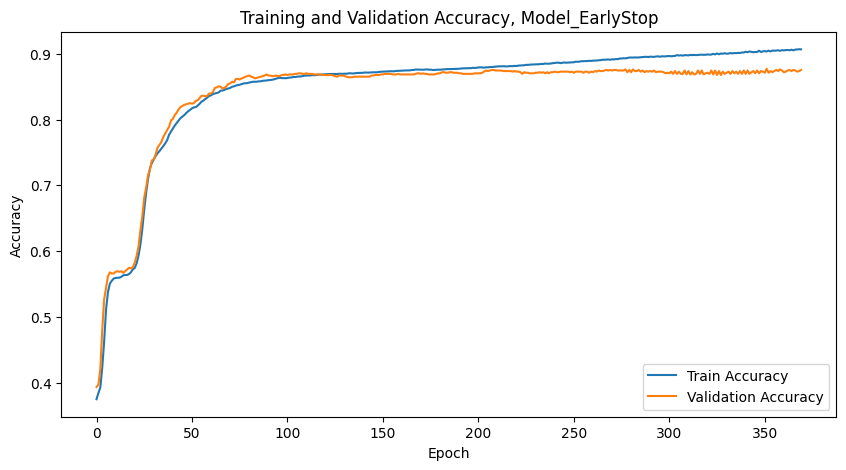

In [36]:
model_earlyStopping.plot_acc("Model_EarlyStop")

In [37]:
# predicted = model_earlyStopping.predict(X_test)
# model_earlyStopping.test_acc(predicted, y_test)
model_earlyStopping.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 90.64%
Validation Accuracy: 87.53%
Test Accuracy: 86.76%


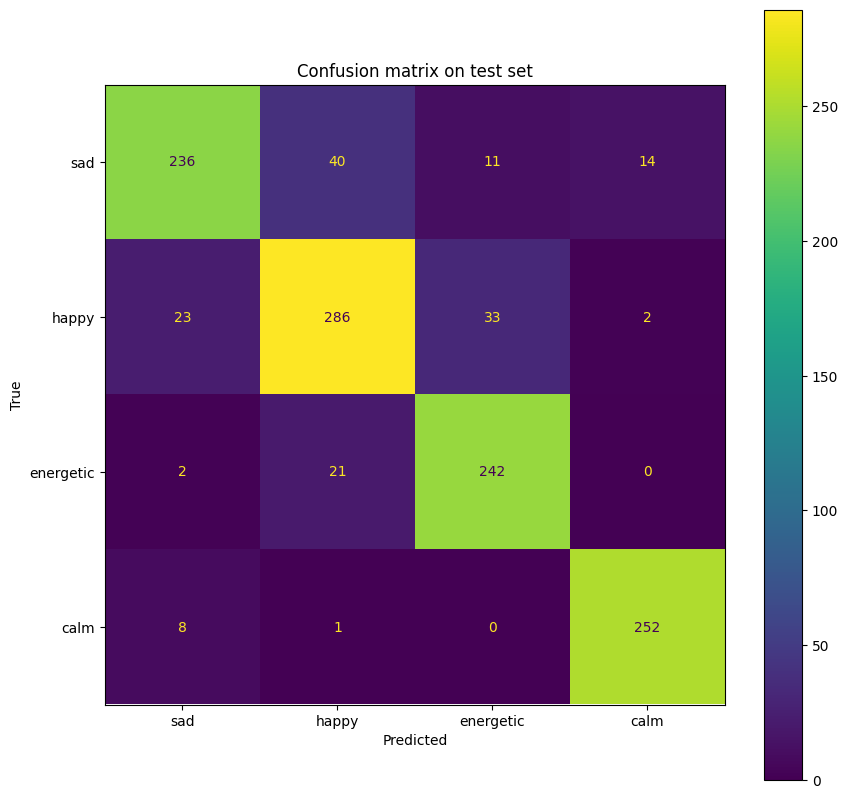

In [38]:
predicted = model_earlyStopping.predict(X_test)
model_earlyStopping.plot_conf_matrix(predicted, y_test, emotion_values)

## Cast 3, hyperparametre zmenit 5x

### Model1

In [40]:
model1 = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[128, 64, 64, 32], dropout_prob=0.5)
model1.train_model(X_train, y_train, epochs=1000, lr=0.001, early_stopping=True, early_stopping_patience=10, X_val=X_val, y_val=y_val)
model1.load_state_dict(model1.best_model_state)

<All keys matched successfully>

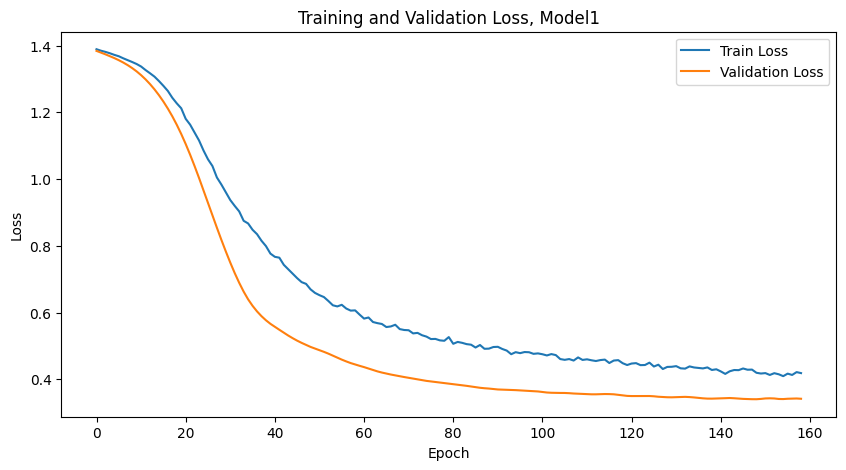

In [41]:
model1.plot_loss("Model1")

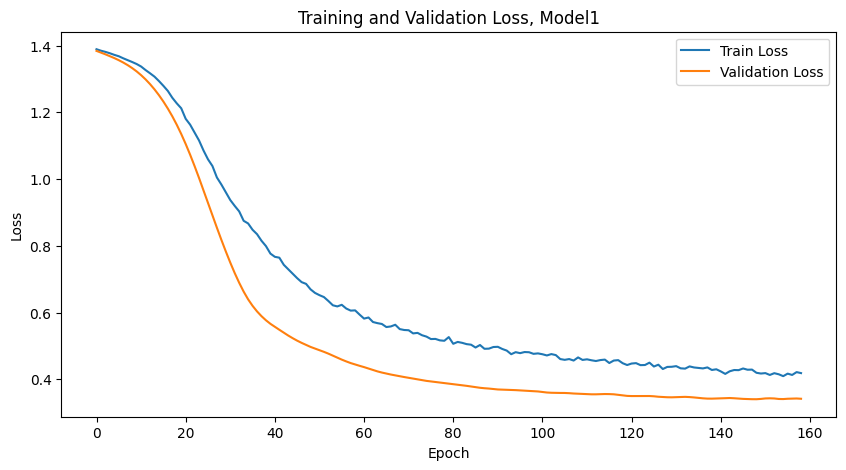

In [42]:
model1.plot_loss("Model1")

In [43]:
# predicted = model1.predict(X_test)
# model1.test_acc(predicted, y_test)
model1.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 87.31%
Validation Accuracy: 86.17%
Test Accuracy: 85.91%


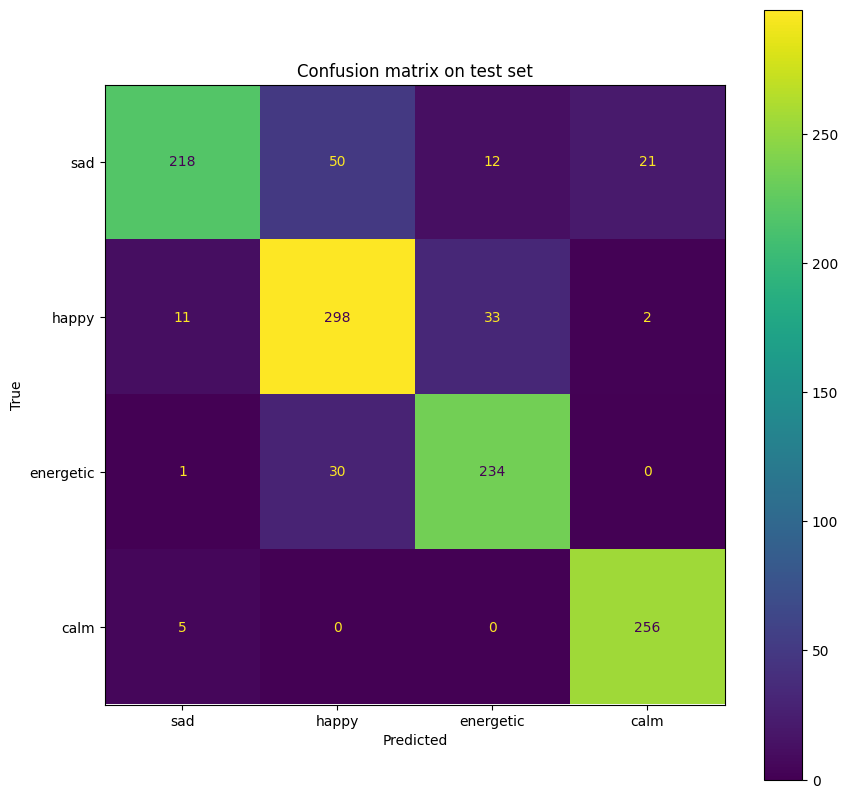

In [44]:
predicted = model1.predict(X_test)
model1.plot_conf_matrix(predicted, y_test, emotion_values)

### Model 2

In [45]:
model2 = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[64, 32], dropout_prob=0.3)
model2.train_model(X_train, y_train, epochs=300, lr=0.01, early_stopping=True, early_stopping_patience=10, X_val=X_val, y_val=y_val)
model2.load_state_dict(model2.best_model_state)

<All keys matched successfully>

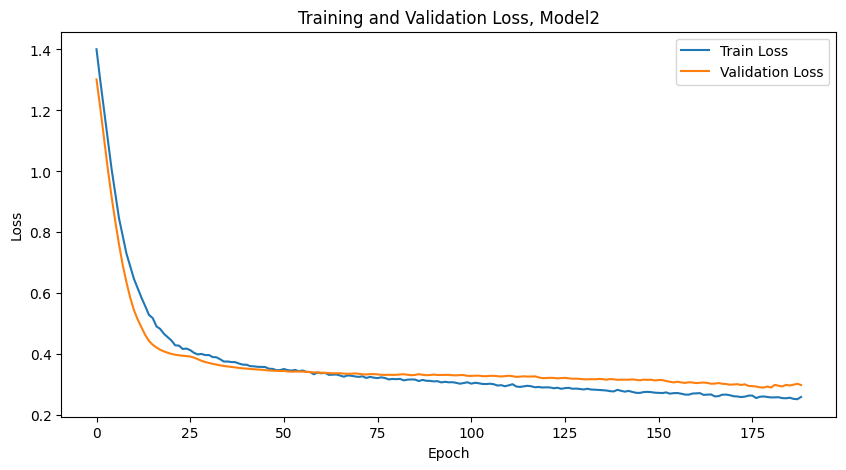

In [46]:
model2.plot_loss("Model2")

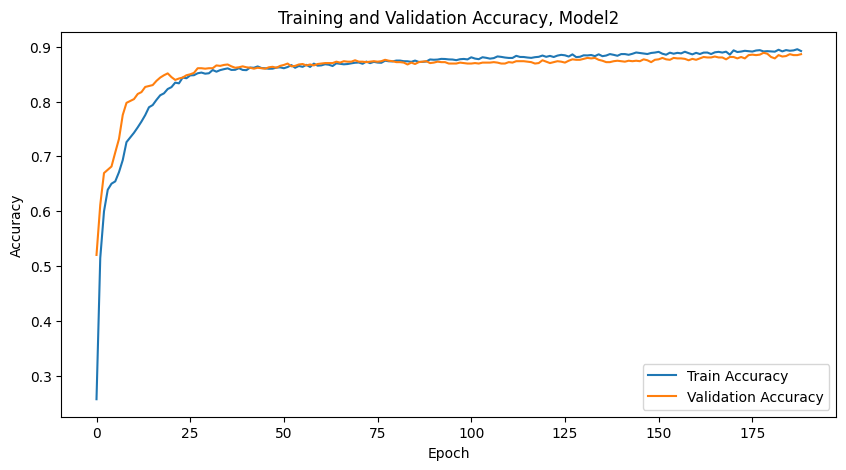

In [47]:
model2.plot_acc("Model2")

In [48]:
# predicted = model2.predict(X_test)
# model2.test_acc(predicted, y_test)
model2.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 89.89%
Validation Accuracy: 88.64%
Test Accuracy: 86.34%


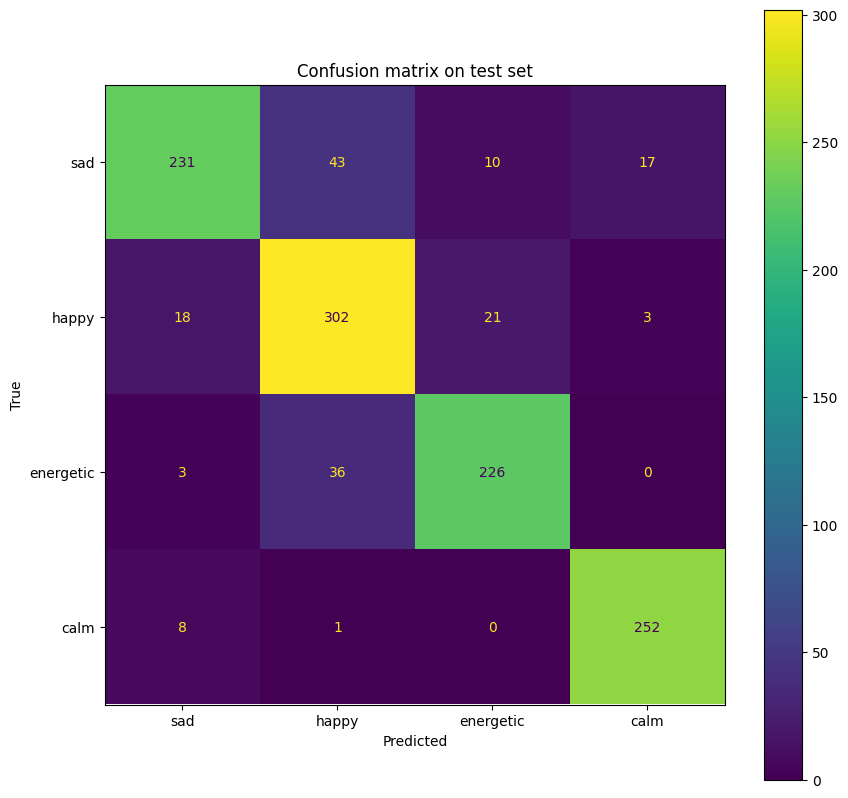

In [49]:
predicted = model2.predict(X_test)
model2.plot_conf_matrix(predicted, y_test, emotion_values)

### Model3

In [50]:
model3 = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[128, 64, 32], dropout_prob=0.5)
model3.train_model(X_train, y_train, epochs=1000, lr=0.1, early_stopping=True, early_stopping_patience=6, X_val=X_val, y_val=y_val)
model3.load_state_dict(model3.best_model_state)

<All keys matched successfully>

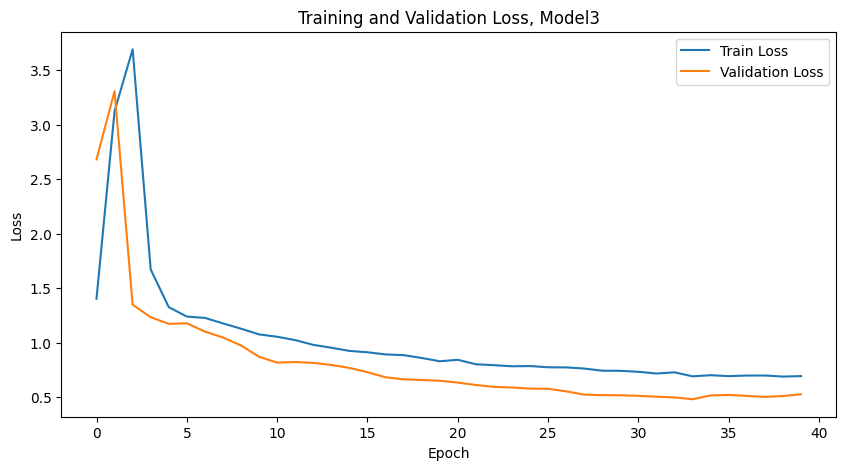

In [51]:
model3.plot_loss("Model3")

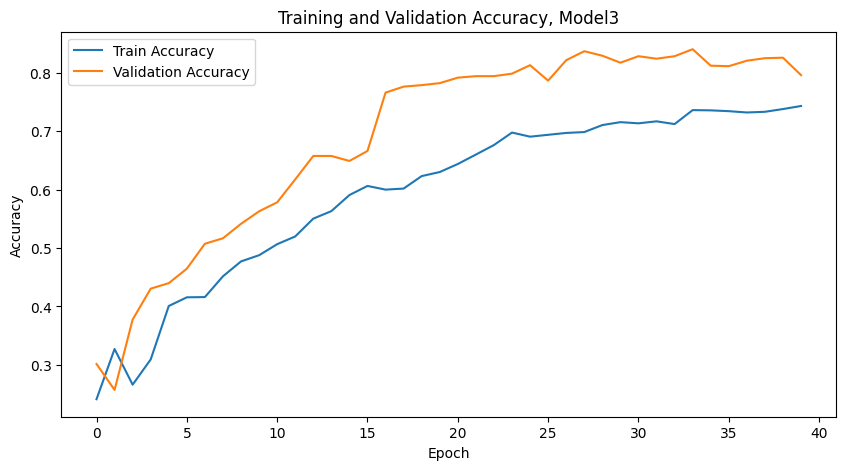

In [52]:
model3.plot_acc("Model3")

In [53]:
# predicted = model3.predict(X_test)
# model3.test_acc(predicted, y_test)
model3.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 80.40%
Validation Accuracy: 79.59%
Test Accuracy: 79.50%


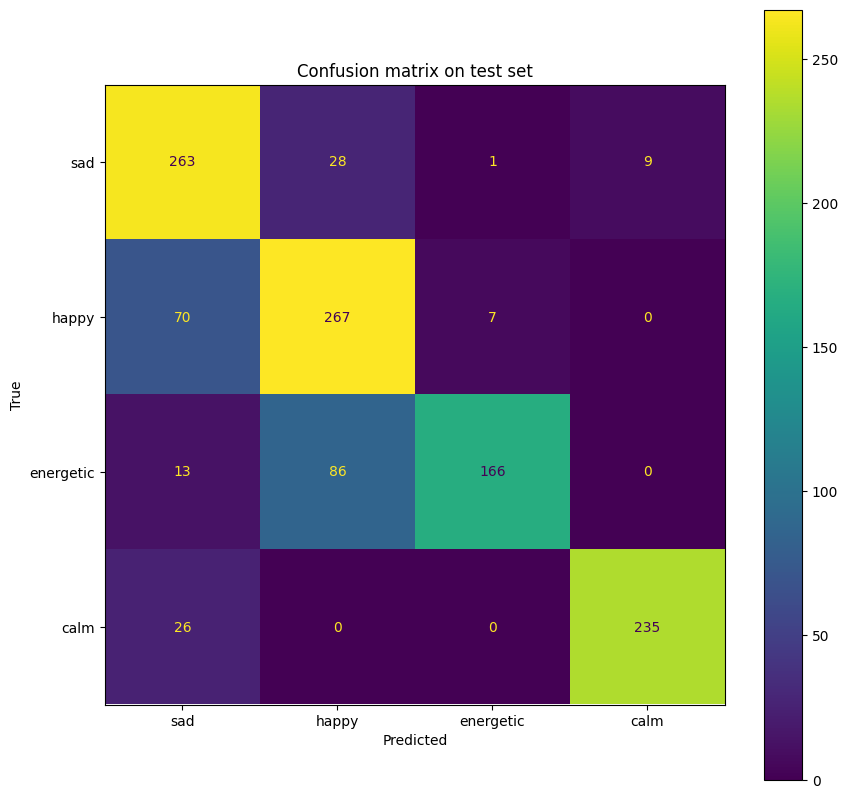

In [54]:
predicted = model3.predict(X_test)
model3.plot_conf_matrix(predicted, y_test, emotion_values)

### Model4

In [55]:
model4 = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[64, 32], dropout_prob=0.3)
model4.train_model(X_train, y_train, epochs=300, lr=0.1, early_stopping=True, early_stopping_patience=10, X_val=X_val, y_val=y_val)
model4.load_state_dict(model4.best_model_state)

<All keys matched successfully>

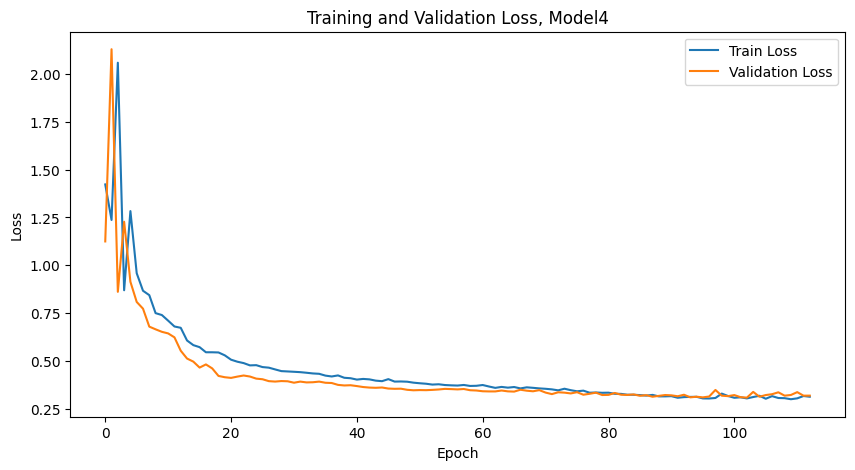

In [56]:
model4.plot_loss("Model4")

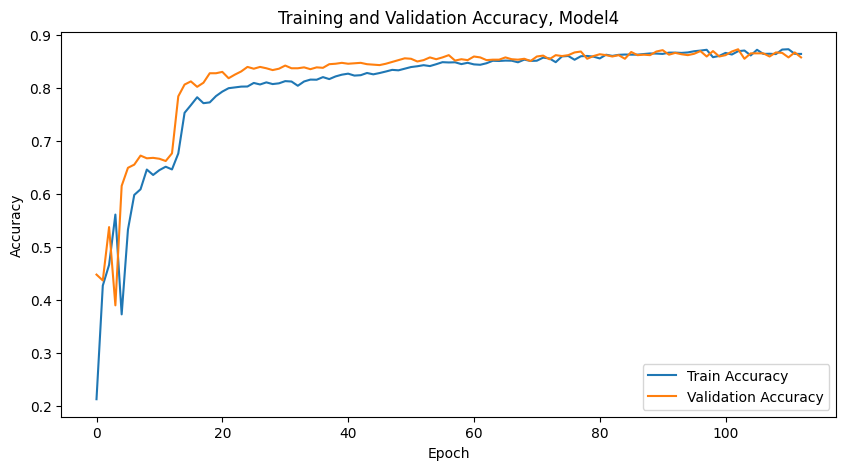

In [57]:
model4.plot_acc("Model4")

In [58]:
# predicted = model4.predict(X_test)
# model4.test_acc(predicted, y_test)
model4.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 87.61%
Validation Accuracy: 85.82%
Test Accuracy: 85.65%


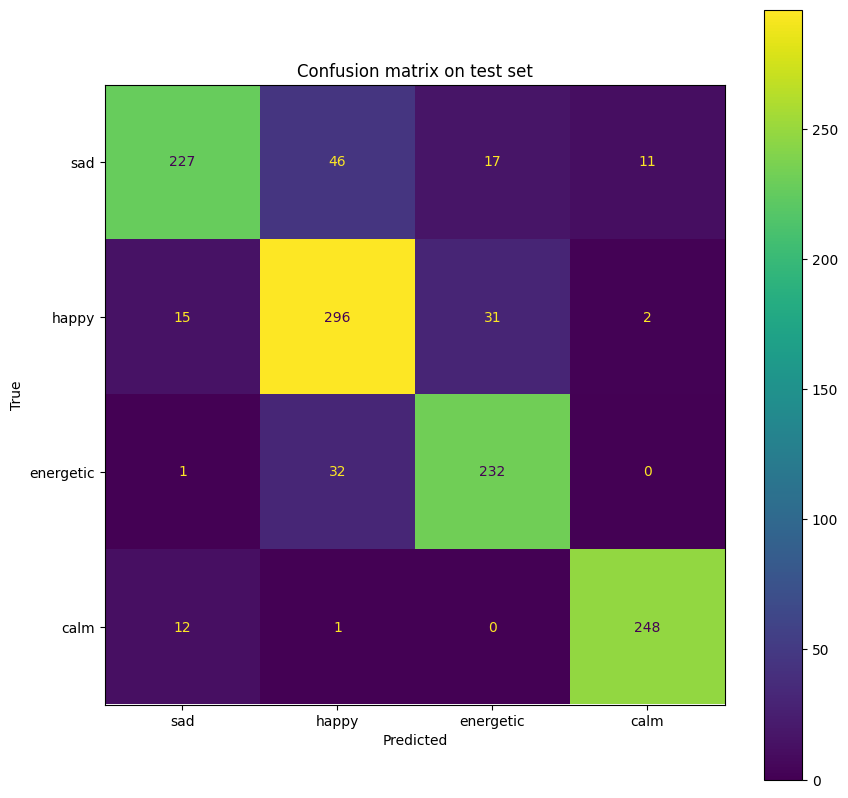

In [59]:
predicted = model4.predict(X_test)
model4.plot_conf_matrix(predicted, y_test, emotion_values)

### Model5

In [60]:
model5 = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[64, 32], dropout_prob=0.2)
model5.train_model(X_train, y_train, epochs=400, lr=0.01, early_stopping=True, early_stopping_patience=20, X_val=X_val, y_val=y_val)
model5.load_state_dict(model5.best_model_state)

<All keys matched successfully>

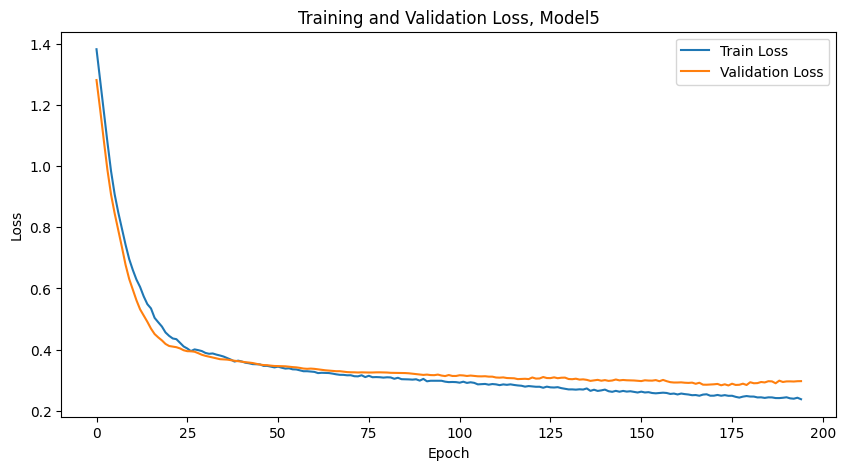

In [61]:
model5.plot_loss("Model5")

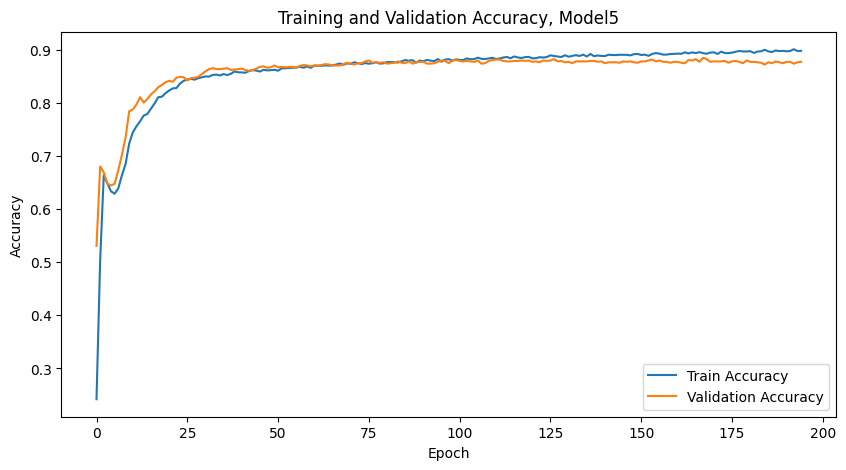

In [62]:
model5.plot_acc("Model5")

In [63]:
# predicted = model4.predict(X_test)
# model4.test_acc(predicted, y_test)
model5.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 90.57%
Validation Accuracy: 87.79%
Test Accuracy: 86.93%


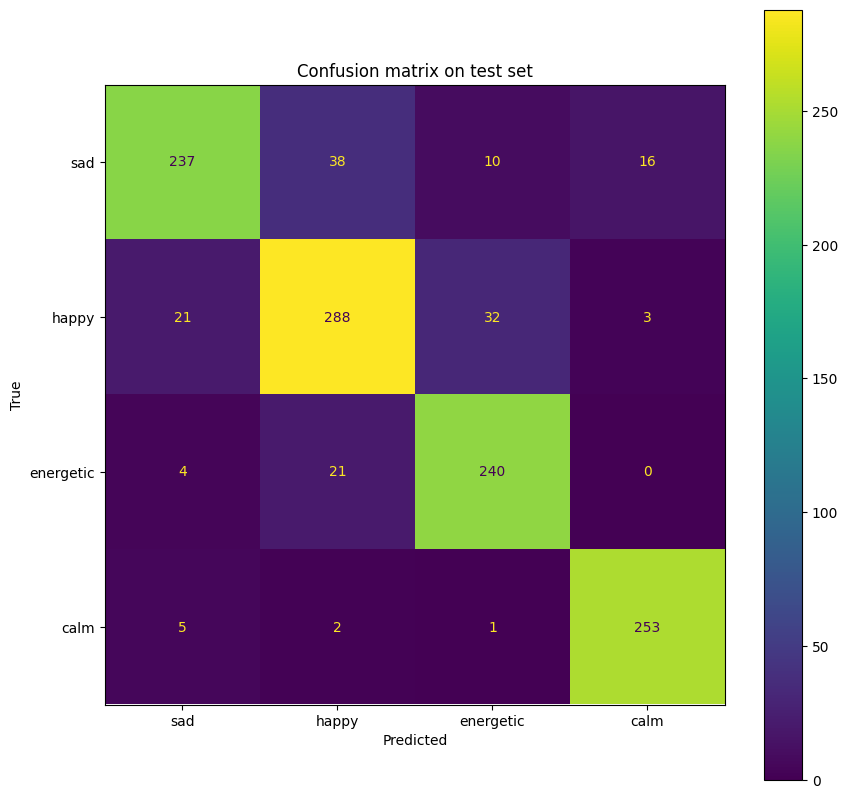

In [64]:
predicted = model5.predict(X_test)
model5.plot_conf_matrix(predicted, y_test, emotion_values)

## Bonus

### Pomocou grid searchu prehladavat aspon 10 kombinacii parametrov.

In [65]:
import ray
from ray import tune

In [66]:
def train_tune(config):
    model = NeuralNetwork(input_size, output_size, config["hidden_layer_sizes"], config["dropout_prob"])
    model.train_model(X_train, y_train, epochs=config["epochs"], lr=config["lr"], X_val=X_val, y_val=y_val, early_stopping=True, early_stopping_patience=5)
    val_loss = model.val_losses[-1]
#     val_accuracy = model.val_accuracies[-1]
    ray.train.report({"val_loss": val_loss })

In [67]:
search_space = {
    "lr": tune.grid_search([0.001, 0.01, 0.1]),
    "hidden_layer_sizes": tune.grid_search([[128, 64, 32], [256, 128, 64], [512, 256, 128]]),
    "dropout_prob": tune.grid_search([0.3, 0.2, 0.5]),
    "epochs": 500
}

In [68]:
analysis = tune.run(
    train_tune,
    config=search_space,
    num_samples=1,
    metric="val_loss",
    mode="min"
)

2023-11-02 03:34:48,405	INFO worker.py:1642 -- Started a local Ray instance.
2023-11-02 03:34:49,692	INFO tune.py:228 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-11-02 03:34:49,695	INFO tune.py:645 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Trial name,val_loss
train_tune_6522b_00000,0.334247
train_tune_6522b_00001,0.3381
train_tune_6522b_00002,0.343926
train_tune_6522b_00003,0.329009
train_tune_6522b_00004,0.296244
train_tune_6522b_00005,0.33896
train_tune_6522b_00006,0.313592
train_tune_6522b_00007,0.319893
train_tune_6522b_00008,0.327663
train_tune_6522b_00009,0.315158


2023-11-02 03:36:00,432	INFO tune.py:1143 -- Total run time: 70.74 seconds (70.62 seconds for the tuning loop).


In [69]:
best_config = analysis.get_best_config(metric="val_loss", mode="min")
print("Best configuration is:", best_config)

Best configuration is: {'lr': 0.001, 'hidden_layer_sizes': [256, 128, 64], 'dropout_prob': 0.2, 'epochs': 500}


In [70]:
worst_config = analysis.get_best_config(metric="val_loss", mode="max")
print("Best configuration is:", worst_config)

Best configuration is: {'lr': 0.1, 'hidden_layer_sizes': [512, 256, 128], 'dropout_prob': 0.5, 'epochs': 500}


In [72]:
analysis.results_df[['config/lr', 
                     'config/hidden_layer_sizes', 
                     'config/dropout_prob', 
                     'val_loss']].sort_values(by='val_loss', ascending=True)

,config/lr,config/hidden_layer_sizes,config/dropout_prob,val_loss
trial_id,,,,
6522b_00004,0.001,"[256, 128, 64]",0.2,0.296244
6522b_00015,0.010,"[512, 256, 128]",0.3,0.308377
6522b_00014,0.010,"[256, 128, 64]",0.5,0.311617
6522b_00006,0.001,"[512, 256, 128]",0.3,0.313592
6522b_00009,0.010,"[128, 64, 32]",0.3,0.315158
6522b_00013,0.010,"[256, 128, 64]",0.2,0.318332
6522b_00010,0.010,"[128, 64, 32]",0.2,0.318377
6522b_00007,0.001,"[512, 256, 128]",0.2,0.319893
6522b_00016,0.010,"[512, 256, 128]",0.2,0.321054


In [74]:
best_model = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[256, 128, 64], dropout_prob=0.2)
best_model.train_model(X_train, y_train, epochs=500, lr=0.001, early_stopping=True, early_stopping_patience=5, X_val=X_val, y_val=y_val)
best_model.load_state_dict(best_model.best_model_state)

<All keys matched successfully>

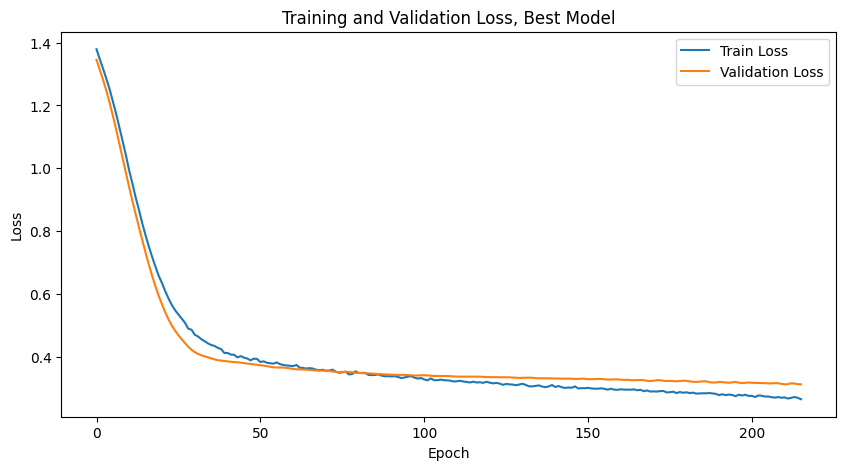

In [75]:
best_model.plot_loss("Best Model")

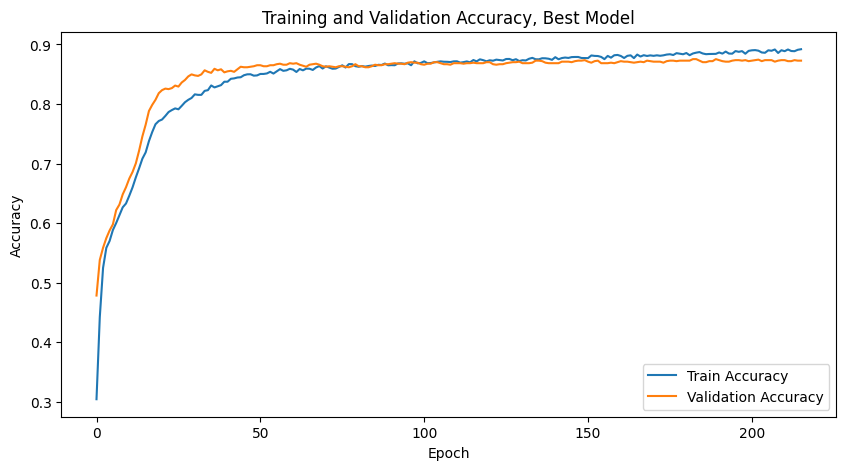

In [76]:
best_model.plot_acc("Best Model")

In [77]:
# predicted = best_model.predict(X_test)
# best_model.test_acc(predicted, y_test)
best_model.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 89.66%
Validation Accuracy: 87.28%
Test Accuracy: 87.36%


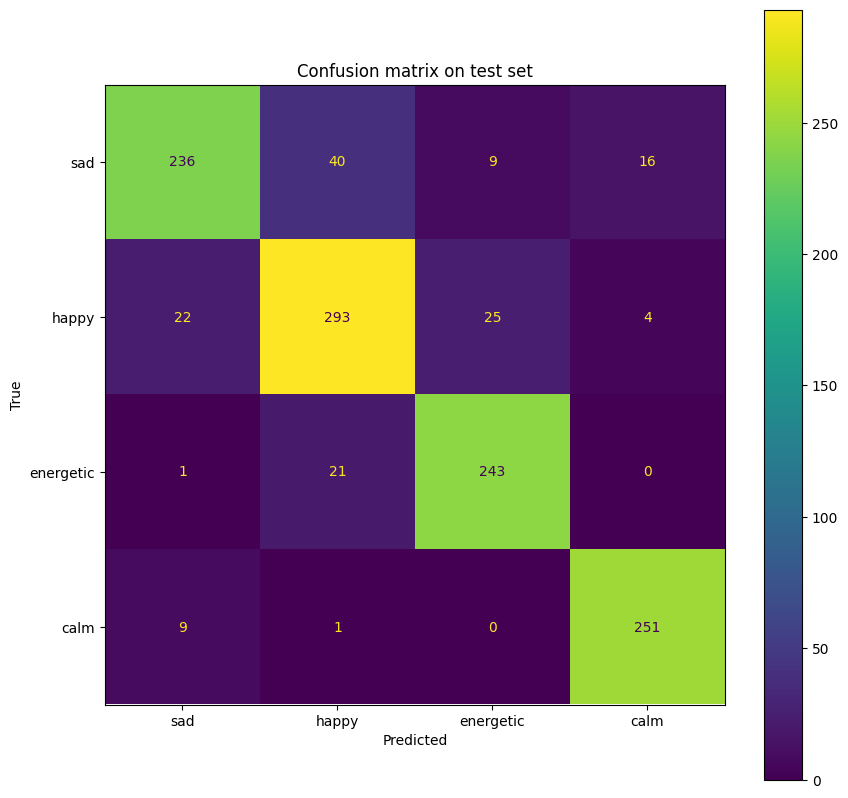

In [78]:
predicted = best_model.predict(X_test)
best_model.plot_conf_matrix(predicted, y_test, emotion_values)

In [79]:
worst_model = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[512, 256, 128], dropout_prob=0.5)
worst_model.train_model(X_train, y_train, epochs=500, lr=0.1, early_stopping=True, early_stopping_patience=5, X_val=X_val, y_val=y_val)
worst_model.load_state_dict(worst_model.best_model_state)

<All keys matched successfully>

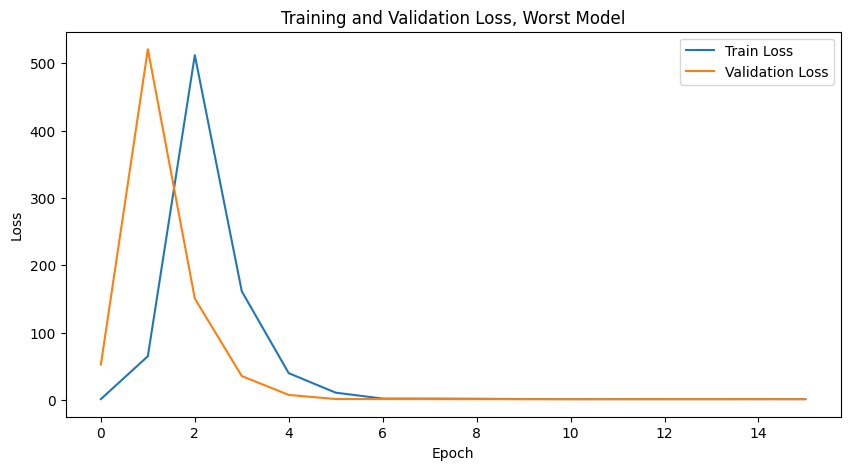

In [80]:
worst_model.plot_loss("Worst Model")

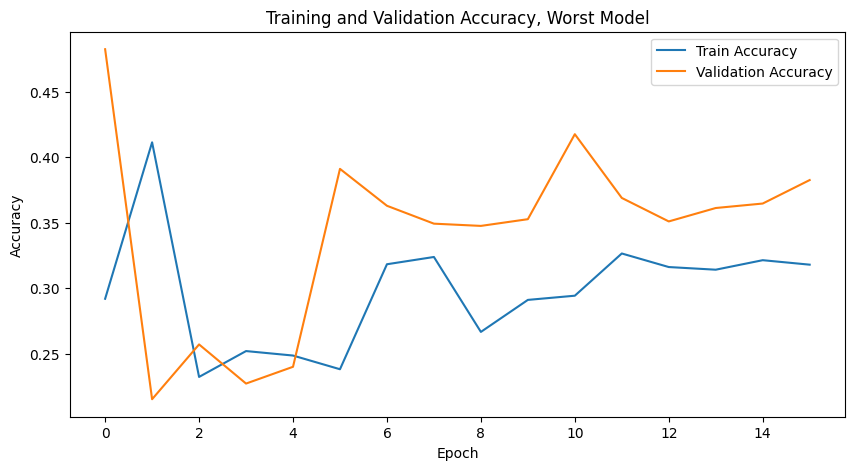

In [81]:
worst_model.plot_acc("Worst Model")

In [82]:
# predicted = worst_model.predict(X_test)
# worst_model.test_acc(predicted, y_test)
worst_model.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 36.29%
Validation Accuracy: 38.26%
Test Accuracy: 37.49%


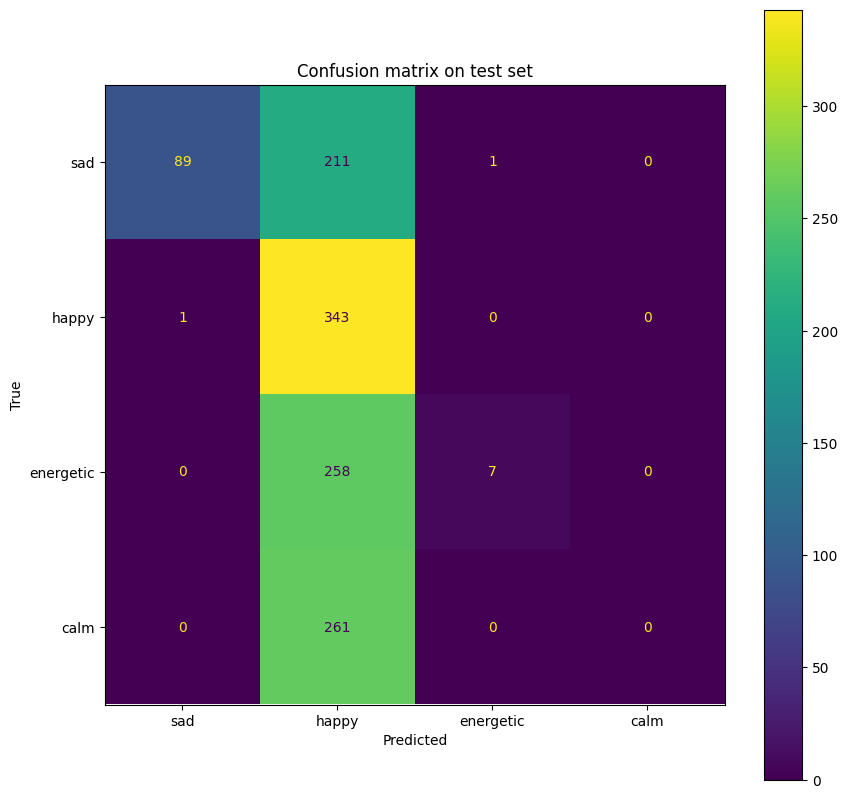

In [83]:
predicted = worst_model.predict(X_test)
worst_model.plot_conf_matrix(predicted, y_test, emotion_values)

## Bonus last
Natrénujte vašu siet’ na riešenie iného problému - klasifikácia žánrov alebo obl’úbenosti (využite stĺpec popularity na vytvorenie vlastných kategóriı́, netrénujte siet’ na čı́selnú hodnotu). Natrénovanú siet’ vyhodnot’te a zobrazte úspešnosti pomocou grafov

In [84]:
bonus_df = pd.read_csv('zadanie1_dataset.csv')

drop_columns = ['name', 'url', 'genres', 'filtered_genres']
explicit_dict = {True: 1, False: 0}

bonus_df['loudness'] = bonus_df[bonus_df['loudness'] <= 0]['loudness']
bonus_df['explicit'] = bonus_df['explicit'].map(explicit_dict)

bonus_df = pd.concat([bonus_df, pd.get_dummies(bonus_df['top_genre'], prefix='genre').astype(int)], axis=1)
bonus_df.drop('top_genre', axis=1, inplace=True)

bonus_df = pd.concat([bonus_df, pd.get_dummies(bonus_df['emotion'], prefix='emotion').astype(int)], axis=1)
bonus_df.drop('emotion', axis=1, inplace=True)

bonus_df['duration_ms'] = bonus_df[bonus_df['duration_ms'] > 0]['duration_ms']

bonus_df = bonus_df.sort_values(by='popularity')


num_bins = 5
bin_size = len(bonus_df) // num_bins

bonus_df['bin_id'] = (bonus_df.index // bin_size) + 1
bonus_df['bin_id'] = bonus_df['bin_id'].astype(int)
bonus_df['bin_id'] = bonus_df['bin_id'].clip(1, num_bins)

bin_id_to_label = {
    1: "Very Low",
    2: "Low",
    3: "Medium",
    4: "High",
    5: "Very High"
}
bonus_df['popularity'] = bonus_df['bin_id'].map(bin_id_to_label)
bonus_df = bonus_df.drop(columns=['bin_id'])


popularity_dict = { 'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
bonus_df['popularity'] = bonus_df['popularity'].map(popularity_dict)

bonus_df.dropna(inplace=True)
bonus_df.drop(drop_columns, axis=1, inplace=True)

bonus_df['popularity'] = bonus_df['popularity'].astype(int)

In [85]:
bonus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 9337 to 11812
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11825 non-null  float64
 1   energy             11825 non-null  float64
 2   loudness           11825 non-null  float64
 3   speechiness        11825 non-null  float64
 4   acousticness       11825 non-null  float64
 5   instrumentalness   11825 non-null  float64
 6   liveness           11825 non-null  float64
 7   valence            11825 non-null  float64
 8   tempo              11825 non-null  float64
 9   duration_ms        11825 non-null  float64
 10  popularity         11825 non-null  int64  
 11  number_of_artists  11825 non-null  float64
 12  explicit           11825 non-null  int64  
 13  genre_ambient      11825 non-null  int64  
 14  genre_anime        11825 non-null  int64  
 15  genre_bluegrass    11825 non-null  int64  
 16  genre_blues        11825

In [86]:
X = bonus_df.drop('popularity', axis=1)
y = bonus_df['popularity']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [87]:
input_size = len(X.columns)
output_size = len(y.unique())

In [88]:
def train_tune(config):
    model = NeuralNetwork(input_size, output_size, config["hidden_layer_sizes"], config["dropout_prob"])
    model.train_model(X_train, y_train, epochs=config["epochs"], lr=config["lr"], X_val=X_val, y_val=y_val, early_stopping=True, early_stopping_patience=5)
    val_loss = model.val_losses[-1]
#     val_accuracy = model.val_accuracies[-1]
    ray.train.report({"val_loss": val_loss })

In [89]:
search_space = {
    "lr": tune.grid_search([0.001, 0.01, 0.1]),
    "hidden_layer_sizes": tune.grid_search([[128, 64, 32], [256, 128, 64], [512, 256, 128]]),
    "dropout_prob": tune.grid_search([0.3, 0.2, 0.5]),
    "epochs": 500
}

In [90]:
analysis = tune.run(
    train_tune,
    config=search_space,
    num_samples=1,
    metric="val_loss",
    mode="min"
)

2023-11-02 04:07:43,279	INFO tune.py:645 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Trial name,val_loss
train_tune_fd81b_00000,0.711505
train_tune_fd81b_00001,0.723115
train_tune_fd81b_00002,0.719729
train_tune_fd81b_00003,0.686507
train_tune_fd81b_00004,0.693889
train_tune_fd81b_00005,0.698379
train_tune_fd81b_00006,0.694911
train_tune_fd81b_00007,0.687954
train_tune_fd81b_00008,0.694143
train_tune_fd81b_00009,0.704583


2023-11-02 04:08:53,855	INFO tune.py:1143 -- Total run time: 70.58 seconds (70.46 seconds for the tuning loop).


In [91]:
best_config = analysis.get_best_config(metric="val_loss", mode="min")
print("Best configuration is:", best_config)

Best configuration is: {'lr': 0.001, 'hidden_layer_sizes': [256, 128, 64], 'dropout_prob': 0.3, 'epochs': 500}


In [92]:
best_model = NeuralNetwork(input_size, output_size, hidden_layer_sizes=[256, 128, 64], dropout_prob=0.3)
best_model.train_model(X_train, y_train, epochs=500, lr=0.001, early_stopping=True, early_stopping_patience=5, X_val=X_val, y_val=y_val)
best_model.load_state_dict(best_model.best_model_state)

<All keys matched successfully>

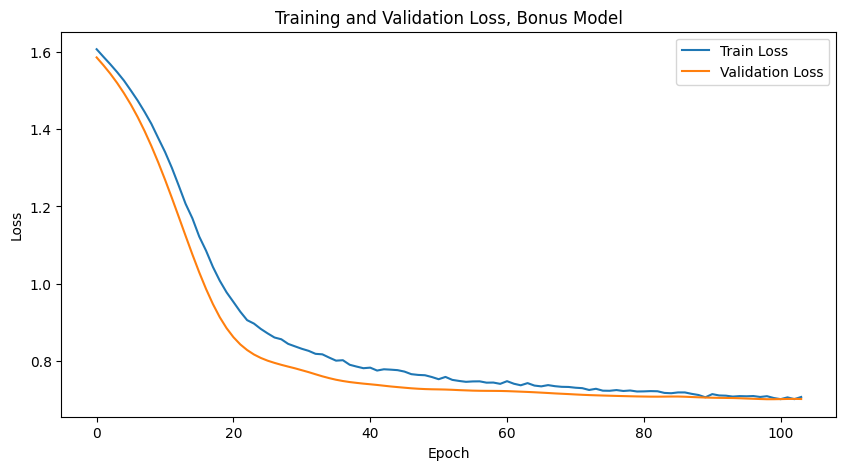

In [93]:
best_model.plot_loss("Bonus Model")

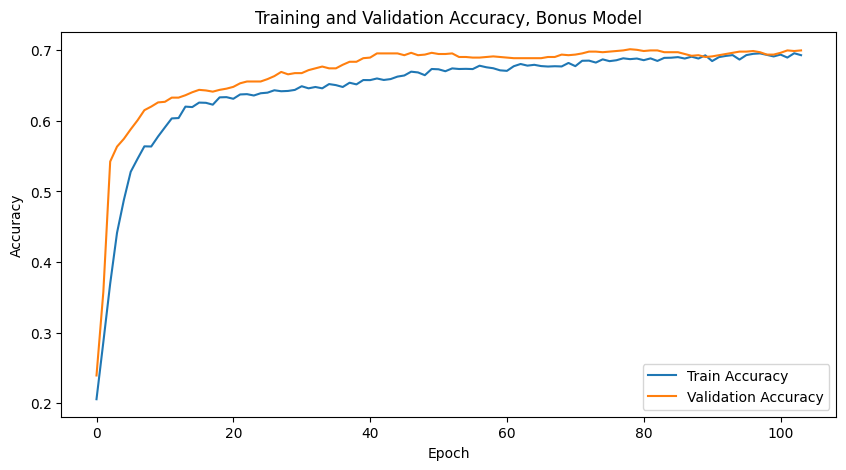

In [94]:
best_model.plot_acc("Bonus Model")

In [95]:
# predicted = worst_model.predict(X_test)
# worst_model.test_acc(predicted, y_test)
best_model.all_acc(X_train, y_train, X_val, y_val, X_test, y_test)

Training Accuracy: 70.34%
Validation Accuracy: 69.97%
Test Accuracy: 68.22%


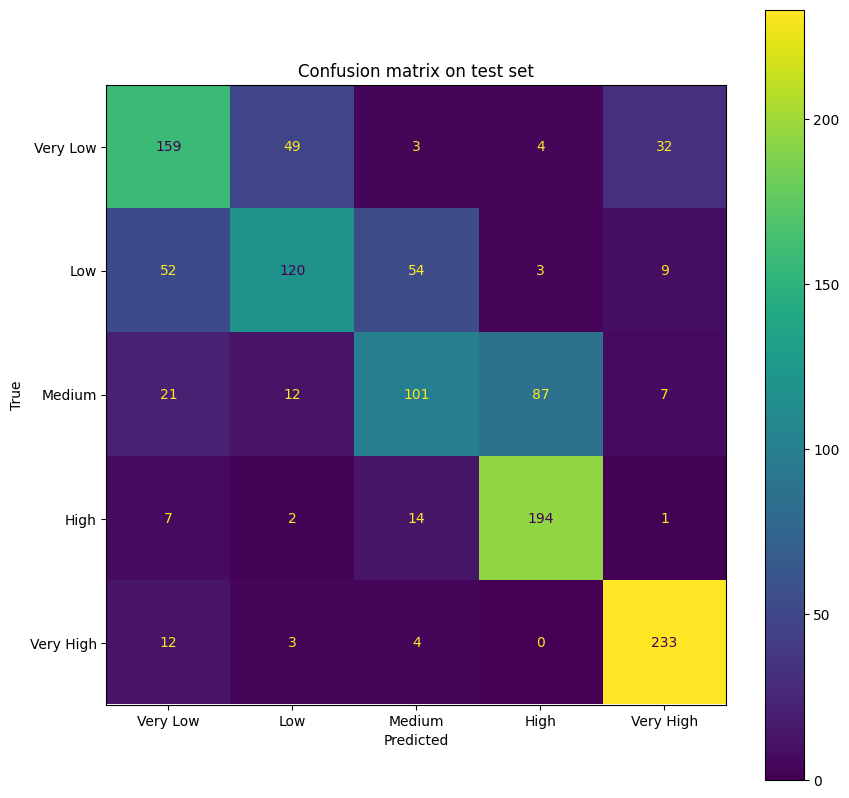

In [97]:
popularity_values = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
predicted = best_model.predict(X_test)
best_model.plot_conf_matrix(predicted, y_test, popularity_values)